In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from math import sqrt

import pandas_profiling as pp
from pandas_profiling import ProfileReport

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC

In [2]:
credit = pd.read_csv('cc_default.csv', skiprows=1)

In [3]:
#rename the col
credit['default'] = credit['default payment next month']
#get rid of unneeded cols
credit = credit.drop(['ID', 'default payment next month'], axis=1)
#clean the data dups
credit = credit.drop_duplicates()
#look for null values
nulls = credit.isnull().sum()
nulls

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [4]:
credit.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
dtype: object

In [5]:
#tells you that there are only two and the top count is female
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [6]:
#SEX needs to be a number
#use the encoder
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX'] = le.transform(credit['SEX'])

In [7]:
credit['SEX'].describe()

count    29965.000000
mean         0.396262
std          0.489128
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SEX, dtype: float64

In [8]:
credit['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

In [9]:
#default needs to be a number
#use the encoder
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])

In [10]:
#check the types, education needs to be numerical but has more than 2 options...use one-hot encoding
#it is different than sex, marriage because those are catagorical(binary).
#A REGRESSION ALGORITHM WILL ONLY USE DATA THAT IS CATAGORICAL
credit.dtypes

LIMIT_BAL     int64
SEX           int32
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int32
dtype: object

In [11]:
#one hot encode here
credit = pd.get_dummies(credit)

In [12]:
credit.dtypes

LIMIT_BAL                    int64
SEX                          int32
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
PAY_AMT1                     int64
PAY_AMT2                     int64
PAY_AMT3                     int64
PAY_AMT4                     int64
PAY_AMT5                     int64
PAY_AMT6                     int64
default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

In [13]:
#If left alone a regression problem will treat the negative numbers worse than the positives. But they are
#a good thing...-2 = no consumption & -1 = paid in full...the algorithm doesn't need the negatives
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

In [14]:
credit.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,0.356416,0.320340,0.304288,0.258935,0.221625,0.226698,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,0.760752,0.802064,0.790696,0.761200,0.717768,0.715483,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#profile = ProfileReport(credit, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [16]:
#profile.to_file(output_file="EDA_after_processing.html")

In [17]:
#profile

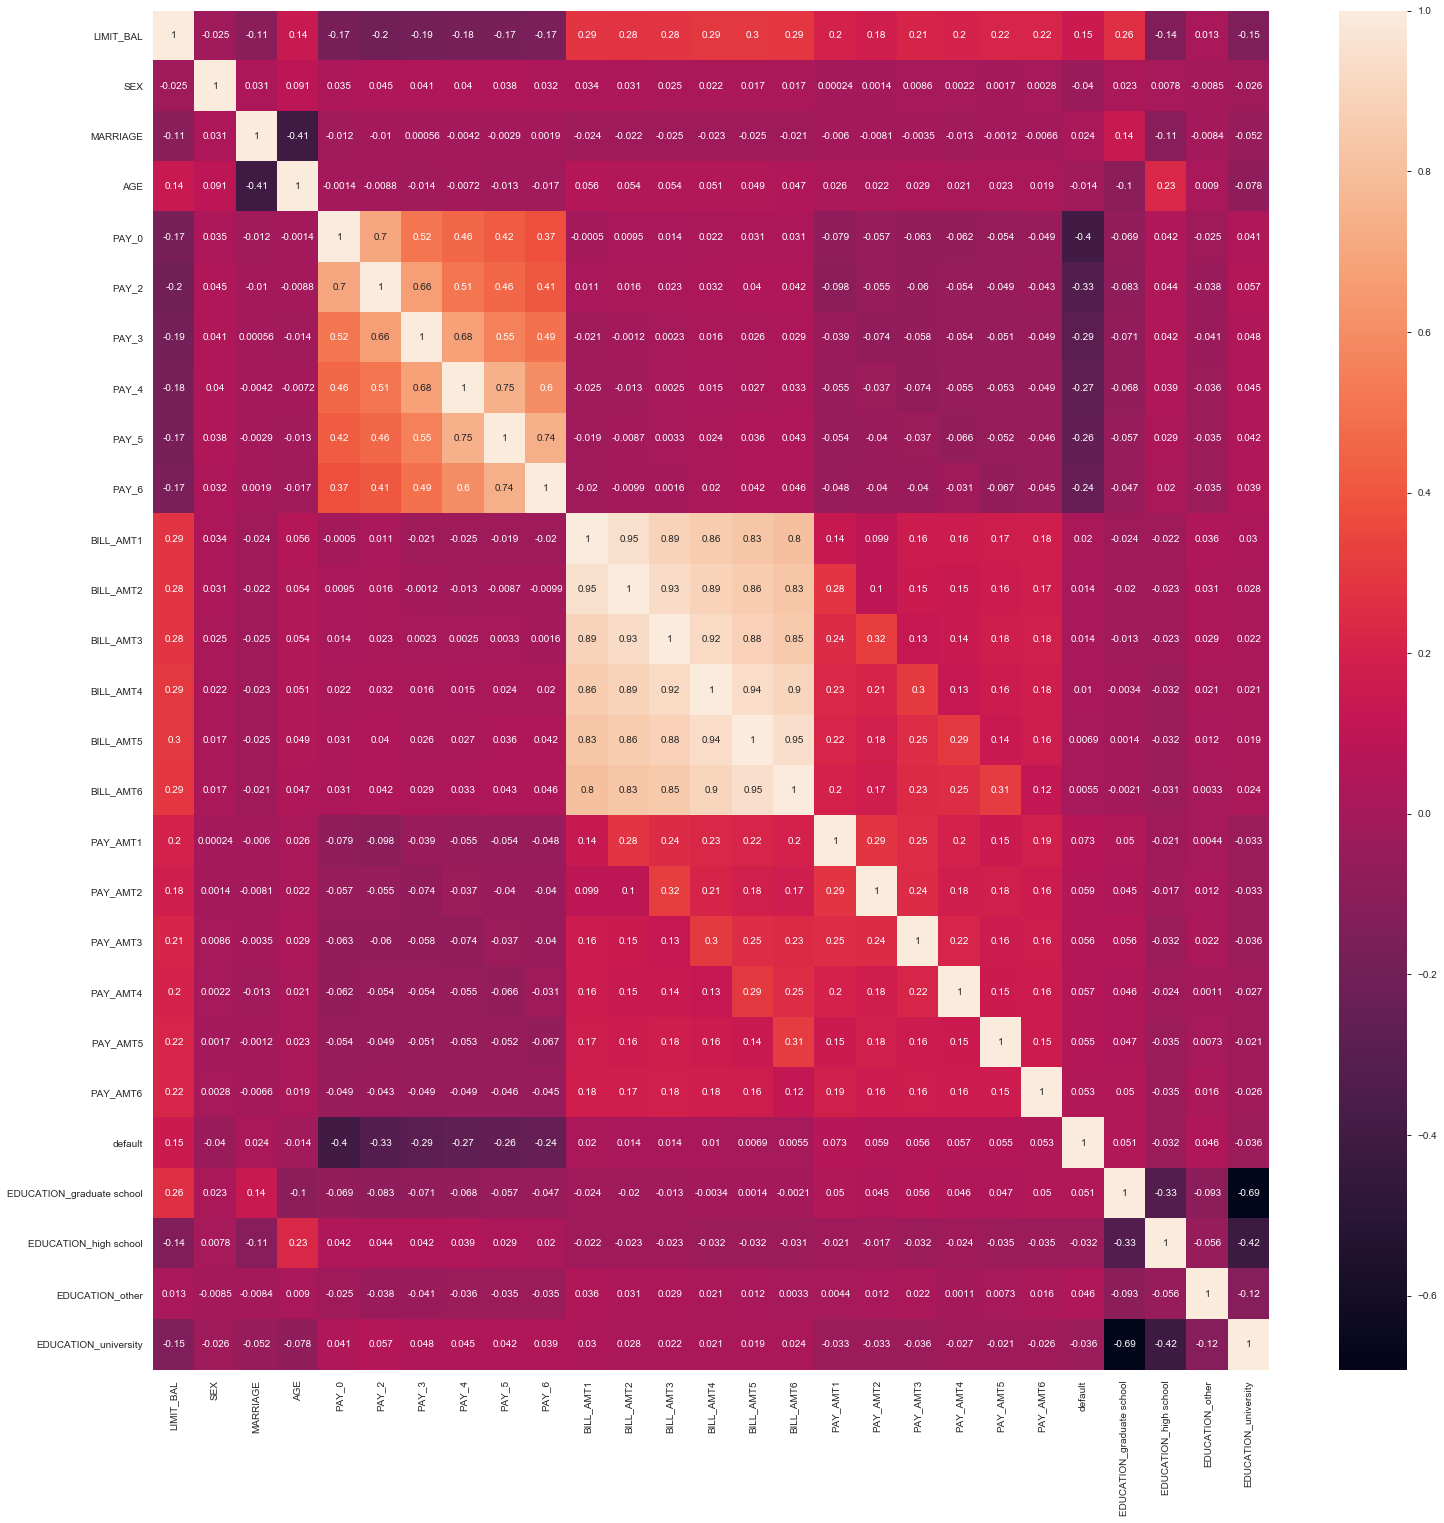

In [18]:
# THE ONLY WAY YOU CAN MAKE DECISIONS ABOUT FEATURES IS BY LOOKING AT CORRELATION WHEN TWO FEATURES ARE HIGHLY CORRELATED
# IT IS CALLED "CO-LINEARITY"
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sn.heatmap(credit_corr, annot=True)
plt.show()

Text(0, 0.5, 'july')

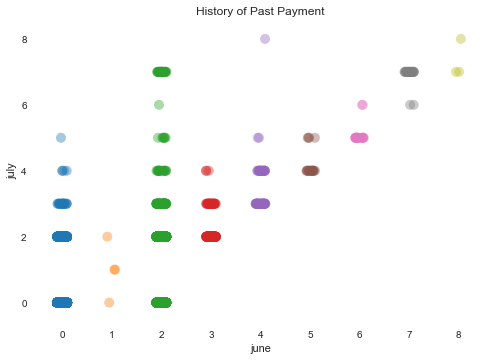

In [19]:
x = credit['PAY_3']
y = credit['PAY_4']
sn.stripplot(x,y,s=10,alpha=0.4,jitter=True,edgecolor='none')
sn.despine()
plt.title('History of Past Payment')
plt.xlabel('june')
plt.ylabel('july')

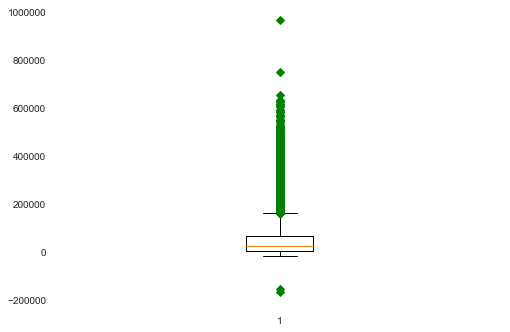

In [20]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [21]:
credit['LIMIT_BAL'].describe()

count      29965.000000
mean      167442.005006
std       129760.135222
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

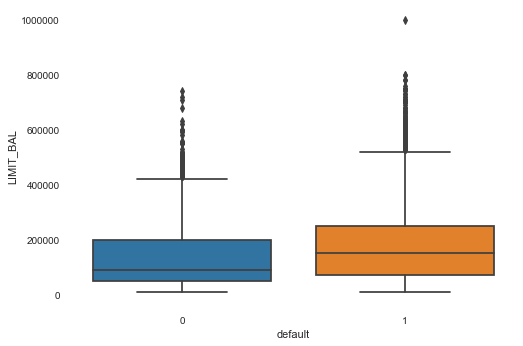

In [22]:
sn.boxplot(x='default',y='LIMIT_BAL',data=credit)

In [23]:
default_bal = credit['default'] == 1
LIM_DEFAULT = credit.loc[default_bal,['LIMIT_BAL']]
LIM_DEFAULT.describe()

,LIMIT_BAL
count,23335.000000
mean,178084.508249
std,131665.894718
min,10000.000000
25%,70000.000000
50%,150000.000000
75%,250000.000000
max,1000000.000000


In [24]:
default_bal2 = credit['default'] == 0
LIM_DEFAULT2 = credit.loc[default_bal2,['LIMIT_BAL']]
LIM_DEFAULT2.describe()

,LIMIT_BAL
count,6630.000000
mean,129984.567119
std,115258.618215
min,10000.000000
25%,50000.000000
50%,90000.000000
75%,200000.000000
max,740000.000000


In [25]:
default_bal3 = credit['default'] == 1
latePayer = credit.loc[default_bal3,['PAY_3']]
latePayer.describe()


,PAY_3
count,23335.000000
mean,0.183373
std,0.617810
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


In [26]:
credit.groupby(['default', 'PAY_0'])['default'].count()

default  PAY_0
0        0         3206
         1         1248
         2         1843
         3          244
         4           52
         5           13
         6            6
         7            7
         8           11
1        0        19963
         1         2419
         2          823
         3           78
         4           24
         5           13
         6            5
         7            2
         8            8
Name: default, dtype: int64

In [27]:
credit.groupby(['default', 'PAY_2'])['default'].count()

default  PAY_2
0        0         4155
         1            5
         2         2183
         3          201
         4           50
         5           15
         6            9
         7           12
1        0        21373
         1           23
         2         1743
         3          125
         4           49
         5           10
         6            3
         7            8
         8            1
Name: default, dtype: int64

In [28]:
credit.groupby(['default', 'PAY_3'])['default'].count()

default  PAY_3
0        0         4429
         1            1
         2         1969
         3          138
         4           43
         5           12
         6           14
         7           22
         8            2
1        0        21324
         1            3
         2         1850
         3          102
         4           32
         5            9
         6            9
         7            5
         8            1
Name: default, dtype: int64

In [29]:
credit.groupby(['default', 'PAY_4'])['default'].count()

default  PAY_4
0        0         4752
         1            1
         2         1653
         3          110
         4           45
         5           18
         6            2
         7           48
         8            1
1        0        21704
         1            1
         2         1506
         3           70
         4           23
         5           17
         6            3
         7           10
         8            1
Name: default, dtype: int64

In [30]:
credit.groupby(['default', 'PAY_5'])['default'].count()

default  PAY_5
0        0         4982
         2         1423
         3          113
         4           50
         5           10
         6            3
         7           48
         8            1
1        0        22016
         2         1203
         3           65
         4           33
         5            7
         6            1
         7           10
Name: default, dtype: int64

In [31]:
credit.groupby(['default', 'PAY_6'])['default'].count()

default  PAY_6
0        0         5020
         2         1401
         3          118
         4           30
         5            7
         6           14
         7           38
         8            2
1        0        21867
         2         1365
         3           66
         4           18
         5            6
         6            5
         7            8
Name: default, dtype: int64